In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import *
from tensorflow.keras.applications import VGG19
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from PIL import Image
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import albumentations as A
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.metrics import *

/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
dataset_path = "/kaggle/input/cvcclinicdb/PNG"

In [3]:
X = []
y = []

In [4]:
dir1 = dataset_path+'/Original'
dir2 = dataset_path+'/Ground Truth'

In [5]:
def load_images_from_directory(directory, dataset):
    for file in os.listdir(directory):
        if file.endswith('.png'):
            img = load_img(os.path.join(directory, file))
            img_array = img_to_array(img)
            dataset.append(img_array)

In [6]:
load_images_from_directory(dir1, X)
load_images_from_directory(dir2, y)

In [7]:
X[12]

array([[[11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.],
        ...,
        [12., 12., 12.],
        [12., 12., 12.],
        [12., 12., 12.]],

       [[11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.],
        ...,
        [12., 12., 12.],
        [12., 12., 12.],
        [12., 12., 12.]],

       [[11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.],
        ...,
        [12., 12., 12.],
        [12., 12., 12.],
        [12., 12., 12.]],

       ...,

       [[11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.],
        ...,
        [11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.]],

       [[11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.],
        ...,
        [11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.]],

       [[11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.],
        ...,
        [11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.]]

In [8]:
y[12]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [9]:
X=np.array(X)
y=np.array(y)

In [10]:
X_uint8 = (X).astype(np.uint8)
y_uint8 = (y).astype(np.uint8)

In [11]:
X = np.array([np.array(Image.fromarray(img).resize((112, 112))) for img in X_uint8])
y = np.array([np.array(Image.fromarray(img).resize((112, 112))) for img in y_uint8])

In [12]:
X = (X).astype(np.float32)/255.0
y = (y).astype(np.float32)/255.0

In [13]:
X.shape

(612, 112, 112, 3)

In [14]:
y.shape

(612, 112, 112, 3)

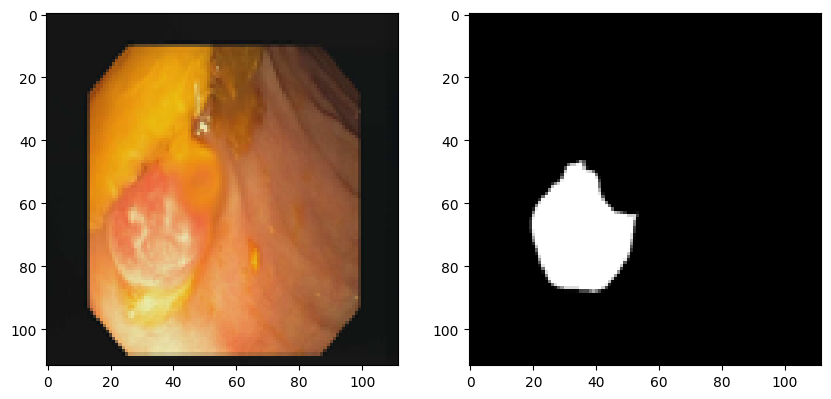

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(X[244])
plt.subplot(1,2,2)
plt.imshow(y[244])
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
y = y[..., 0:1]

In [18]:
y.shape

(612, 112, 112, 1)

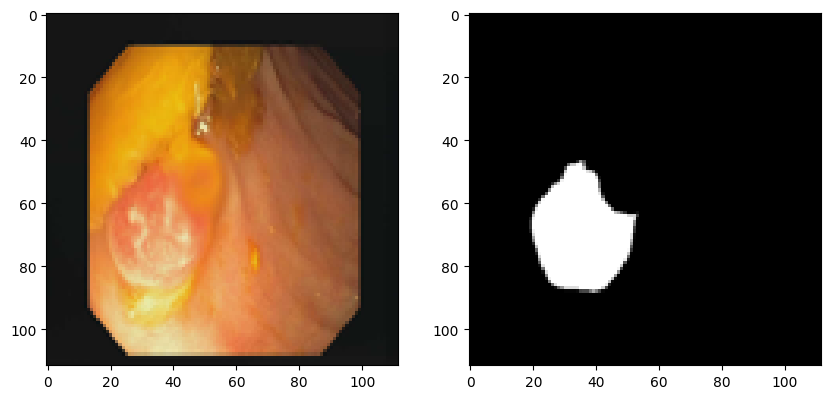

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(X[244])
plt.subplot(1,2,2)
plt.imshow(y[244],cmap='gray')
plt.show()

In [20]:
y[12]

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)

In [21]:
y.shape

(612, 112, 112, 1)

In [22]:
X_train,X_remain,y_train,y_remain=train_test_split(X,y,test_size=0.4,random_state=42)
X_valid,X_test,y_valid,y_test=train_test_split(X_remain,y_remain,test_size=0.5,random_state=42)

In [23]:
print(f'Training set shape: {X_train.shape}')
print(f'Validation set shape: {X_valid.shape}')
print(f'Test set shape: {X_test.shape}')

Training set shape: (367, 112, 112, 3)
Validation set shape: (122, 112, 112, 3)
Test set shape: (123, 112, 112, 3)


In [24]:
transforms = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.5),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.GaussianBlur(blur_limit=3, p=0.3),
    A.OpticalDistortion(distort_limit=0.05, shift_limit=0.05, p=0.5), 
    A.GridDistortion(num_steps=5, distort_limit=0.03, p=0.5)  
])

/opt/conda/lib/python3.10/site-packages/pydantic/main.py:212: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)


In [25]:
def apply_augmentation(image, mask):
    augmented = transforms(image=image, mask=mask)
    img_aug = augmented['image'].astype(np.float32)
    mask_aug = augmented['mask'].astype(np.float32)
    return img_aug, mask_aug

In [26]:
x_train_combined = []
y_train_combined = []

In [27]:
for img, mask in zip(X_train, y_train):
    x_train_combined.append(img)
    y_train_combined.append(mask)
    img_aug, mask_aug = apply_augmentation(img, mask)
    x_train_combined.append(img_aug)
    y_train_combined.append(mask_aug)


In [28]:
X_train = np.array(x_train_combined)
y_train = np.array(y_train_combined)

In [29]:
print("Augmented pairs train shape:", X_train.shape)
print("Combined pairs train shape:", y_train.shape)

Augmented pairs train shape: (734, 112, 112, 3)
Combined pairs train shape: (734, 112, 112, 1)


In [30]:
X_train[237]

array([[[0.04313726, 0.04313726, 0.04313726],
        [0.04313726, 0.04313726, 0.04313726],
        [0.04313726, 0.04313726, 0.04313726],
        ...,
        [0.04313726, 0.04313726, 0.04313726],
        [0.04313726, 0.04313726, 0.04313726],
        [0.04313726, 0.04313726, 0.04313726]],

       [[0.04313726, 0.04313726, 0.04313726],
        [0.04313726, 0.04313726, 0.04313726],
        [0.04313726, 0.04313726, 0.04313726],
        ...,
        [0.04313726, 0.04313726, 0.04313726],
        [0.04313726, 0.04313726, 0.04313726],
        [0.04313726, 0.04313726, 0.04313726]],

       [[0.04313726, 0.04313726, 0.04313726],
        [0.04313726, 0.04313726, 0.04313726],
        [0.04313726, 0.04313726, 0.04313726],
        ...,
        [0.04313726, 0.04313726, 0.04313726],
        [0.04313726, 0.04313726, 0.04313726],
        [0.04313726, 0.04313726, 0.04313726]],

       ...,

       [[0.04313726, 0.04313726, 0.04313726],
        [0.04313725, 0.04313725, 0.04313725],
        [0.04313726, 0

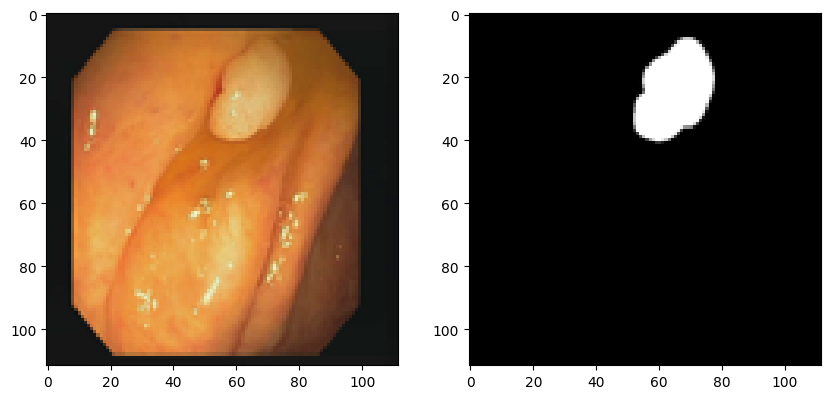

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(X_train[250])
plt.subplot(1,2,2)
plt.imshow(y_train[250],cmap='gray')
plt.show()

In [32]:
def expend_as(tensor, rep):
     return Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3),arguments={'repnum': rep})(tensor)

In [33]:
def gating_signal(input, out_size, batch_norm=False):
    x = Conv2D(out_size, (1, 1), padding='same')(input)
    if batch_norm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

In [34]:
def attention_block(x, gating, inter_shape):
    shape_x = K.int_shape(x)
    shape_g = K.int_shape(gating)

    theta_x = Conv2D(inter_shape, (2, 2), strides=(2, 2), padding='same')(x) 
    shape_theta_x = K.int_shape(theta_x)

    phi_g = Conv2D(inter_shape, (1, 1), padding='same')(gating)
    upsample_g = Conv2DTranspose(inter_shape, (3, 3),strides=(shape_theta_x[1] // shape_g[1], shape_theta_x[2] // shape_g[2]),padding='same')(phi_g)

    concat_xg = add([upsample_g, theta_x])
    act_xg = Activation('relu')(concat_xg)
    psi = Conv2D(1, (1, 1), padding='same')(act_xg)
    sigmoid_xg = Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)
    upsample_psi = UpSampling2D(size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg) 

    upsample_psi = expend_as(upsample_psi, shape_x[3])

    y = multiply([upsample_psi, x])

    result = Conv2D(shape_x[3], (1, 1), padding='same')(y)
    result_bn = BatchNormalization()(result)
    return result_bn

In [35]:
def squeeze_excite_block(inputs, ratio=8):
    init = inputs
    channel_axis = -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    x = Multiply()([init, se])
    return x

In [36]:
def conv_block(inputs, filters, drop_out=0.0):
    x = inputs
    shortcut = inputs

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)

    shortcut = Conv2D(filters, (1, 1), padding="same")(shortcut)
    shortcut = BatchNormalization()(shortcut)

    x = add([shortcut, x])
    x = Activation('relu')(x)

    if drop_out > 0:
        x = Dropout(drop_out)(x)

    x = squeeze_excite_block(x)

    return x

In [37]:
def encoder1(inputs):
    skip_connections = []

    model = VGG19(include_top=False, weights='imagenet', input_tensor=inputs)
    names = ["block1_conv2", "block2_conv2", "block3_conv4", "block4_conv4"]
    for name in names:
        skip_connections.append(model.get_layer(name).output)

    output = model.get_layer("block5_conv4").output
    return output, skip_connections

In [38]:
def decoder1(inputs, skip_connections):
    num_filters = [256, 128, 64, 32]
    channels = [512, 256, 128, 64]
    skip_connections.reverse()
    x = inputs
    shape = x.shape

    for i, f in enumerate(num_filters):
        gating = gating_signal(x, channels[i], True)
        att = attention_block(skip_connections[i], gating, channels[i])
        x = Conv2DTranspose(shape[3], (2, 2), activation="relu", strides=(2, 2))(x)
        x = Concatenate()([x, att])
        if i < 2:
            x = conv_block(x, f, drop_out=0.5)
        else:
            x = conv_block(x, f, drop_out=0.3)

    return x


In [39]:
def encoder2(inputs):
    num_filters = [32, 64, 128, 256]
    skip_connections = []
    x = inputs
    for i, f in enumerate(num_filters):
        x = conv_block(x, f)
        skip_connections.append(x)
        x = MaxPool2D((2, 2))(x)

    return x, skip_connections

In [40]:
def decoder2(inputs, skip_1, skip_2):
    num_filters = [256, 128, 64, 32]
    channels = [512, 256, 128, 64]
    skip_2.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        gating_enc_2 = gating_signal(x, num_filters[i], True)
        att_enc_2 = attention_block(skip_2[i], gating_enc_2, num_filters[i])
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_1[i], att_enc_2])
        if i < 2:
            x = conv_block(x, f, drop_out=0.5)
        else:
            x = conv_block(x, f, drop_out=0.3)

    return x

In [41]:
def output_block(inputs):
    x = Conv2D(1, (1, 1), padding="same")(inputs)
    x = Activation('sigmoid')(x)
    return x

In [42]:
def Upsample(tensor, size):
    def _upsample(x, size):
        return tf.image.resize(images=x, size=size)
    return Lambda(lambda x: _upsample(x, size), output_shape=size)(tensor)

In [43]:
def ASPP(x, filter):
    shape = x.shape

    y1 = AveragePooling2D(pool_size=(shape[1], shape[2]))(x)
    y1 = Conv2D(filter, 1, padding="same")(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[1], shape[2]), interpolation='bilinear')(y1)

    y2 = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(x)
    y2 = BatchNormalization()(y2)
    y2 = Activation("relu")(y2)

    y3 = Conv2D(filter, 3, dilation_rate=6, padding="same", use_bias=False)(x)
    y3 = BatchNormalization()(y3)
    y3 = Activation("relu")(y3)

    y4 = Conv2D(filter, 3, dilation_rate=12, padding="same", use_bias=False)(x)
    y4 = BatchNormalization()(y4)
    y4 = Activation("relu")(y4)

    y5 = Conv2D(filter, 3, dilation_rate=18, padding="same", use_bias=False)(x)
    y5 = BatchNormalization()(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate()([y1, y2, y3, y4, y5])

    y = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)

    return y

In [44]:
def build_model(shape):
    inputs = layers.Input(shape)
    x, skip_1 = encoder1(inputs)
    x = ASPP(x, 64)
    x = decoder1(x, skip_1)
    outputs1 = output_block(x)

    x = inputs * outputs1

    x, skip_2 = encoder2(x)
    x = ASPP(x, 64)
    x = decoder2(x, skip_1, skip_2)
    outputs2 = output_block(x)
    x = Concatenate()([outputs1, outputs2])
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(x)
    model = Model(inputs, outputs)
    return model

In [45]:
input_shape = (112, 112, 3) 
model = build_model(input_shape)

In [46]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 112, 112,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 112, 112,  │      1,792 │ input_layer[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 112, 112,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 56, 56,    │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 56, 56,    │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 56, 56,    │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 28, 28,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 28, 28,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 28, 28,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 28, 28,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv4        │ (None, 28, 28,    │    590,080 │ block3_conv3[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 14, 14,    │          0 │ block3_conv4[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 14, 14,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 14, 14,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 14, 14,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv4        │ (None, 14, 14,    │  2,359,808 │ block4_conv3[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 7, 7, 512) │          0 │ block4_conv4[0][

 Total params: 36,472,813 (139.13 MB)

 Trainable params: 36,456,877 (139.07 MB)

 Non-trainable params: 15,936 (62.25 KB)

In [47]:
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [48]:
def iou(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    union = K.sum(y_true_f) + K.sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)

In [49]:
def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

In [50]:
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss=dice_loss, 
              metrics=[dice_coefficient, iou])

In [51]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)

In [52]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)

X_train shape: (734, 112, 112, 3)
y_train shape: (734, 112, 112, 1)
X_valid shape: (122, 112, 112, 3)
y_valid shape: (122, 112, 112, 1)


In [53]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=250,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping,lr_scheduler])

Epoch 1/250


I0000 00:00:1727595165.520060    1422 service.cc:145] XLA service 0x7cd2200041f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727595165.520132    1422 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1727595300.612594    1422 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


23/23 ━━━━━━━━━━━━━━━━━━━━ 343s 7s/step - dice_coefficient: 0.1772 - iou: 0.0973 - loss: 0.8228 - val_dice_coefficient: 0.1844 - val_iou: 0.1018 - val_loss: 0.8176 - learning_rate: 0.0010
Epoch 2/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 352ms/step - dice_coefficient: 0.1957 - iou: 0.1087 - loss: 0.8043 - val_dice_coefficient: 0.1406 - val_iou: 0.0757 - val_loss: 0.8610 - learning_rate: 0.0010
Epoch 3/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 350ms/step - dice_coefficient: 0.2069 - iou: 0.1157 - loss: 0.7931 - val_dice_coefficient: 0.1403 - val_iou: 0.0756 - val_loss: 0.8612 - learning_rate: 0.0010
Epoch 4/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 349ms/step - dice_coefficient: 0.2032 - iou: 0.1133 - loss: 0.7968 - val_dice_coefficient: 0.1378 - val_iou: 0.0741 - val_loss: 0.8638 - learning_rate: 0.0010
Epoch 5/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 352ms/step - dice_coefficient: 0.2101 - iou: 0.1176 - loss: 0.7899 - val_dice_coefficient: 0.1373 - val_iou: 0.0738 - val_loss: 0.8642 - learning_rate: 0.0010
Epoch 6/

In [54]:
from sklearn.metrics import precision_score, recall_score

In [55]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step


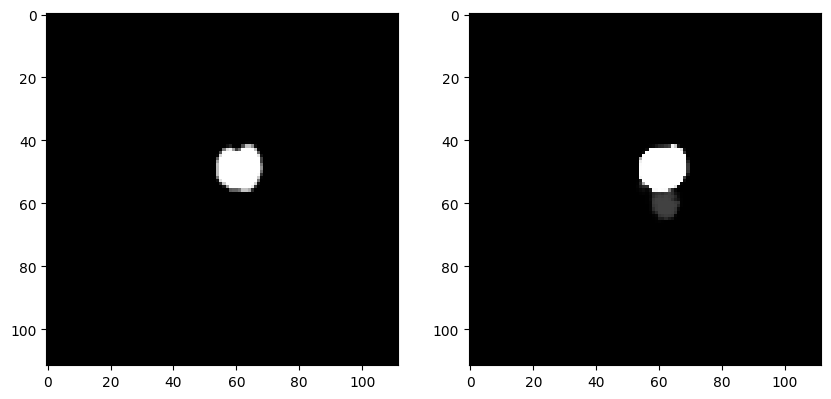

In [56]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(y_test[24],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(y_pred[24],cmap='gray')
plt.show()

In [57]:
y_true_thresholded = (y_test > 0.5).astype(int)
y_output_thresholded = (y_pred > 0.5).astype(int)

In [58]:
y_true_flat = y_true_thresholded.flatten()
y_output_flat = y_output_thresholded.flatten()

In [59]:
def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred) + 1e-7)

In [60]:
def iou(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return intersection / (union + 1e-7) 

In [61]:
dsc = dice_coefficient(y_true_flat, y_output_flat)

In [62]:
iou_value = iou(y_true_flat, y_output_flat)

In [63]:
recall_value = recall_score(y_true_flat, y_output_flat)

In [64]:
precision_value = precision_score(y_true_flat, y_output_flat)

In [65]:
print(f"Dice Similarity Coefficient (DSC): {dsc}")
print(f"Intersection over Union (IoU): {iou_value}")
print(f"Recall: {recall_value}")
print(f"Precision: {precision_value}")

Dice Similarity Coefficient (DSC): 0.8661212708264318
Intersection over Union (IoU): 0.7638570585566127
Recall: 0.8401228605065355
Precision: 0.8937801578444518
